In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
# dataset.keys()
my_df = pd.DataFrame(digits.data, columns=digits.feature_names)
my_df['target'] = digits.target
my_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [4]:
# Creating input and target dataframes
inputs = my_df.drop(columns=['target'])
target = my_df['target']
inputs.shape, target.shape

((1797, 64), (1797,))

In [5]:
#Splitting the datasets into train and test
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, target_train, target_test = train_test_split(inputs, target, test_size=0.2, random_state=88)
print("Training data sets: ", inputs_train.shape, target_train.shape)
print("Testing data sets: ", inputs_test.shape, target_test.shape)

Training data sets:  (1437, 64) (1437,)
Testing data sets:  (360, 64) (360,)


In [9]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10)


In [10]:
#Training the KNN model using training data
model.fit(inputs_train, target_train)

KNeighborsClassifier(n_neighbors=10)

In [11]:
model.score(inputs_test, target_test)

0.975

In [12]:
# Finding predicted values from the model
target_pred = model.predict(inputs_test)
target_pred.shape, target_test.shape

((360,), (360,))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.94      1.00      0.97        29
           2       1.00      1.00      1.00        43
           3       0.94      1.00      0.97        31
           4       0.97      1.00      0.99        35
           5       0.98      0.92      0.95        51
           6       0.98      0.98      0.98        44
           7       1.00      1.00      1.00        30
           8       1.00      0.94      0.97        36
           9       0.94      0.94      0.94        32

    accuracy                           0.97       360
   macro avg       0.97      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360



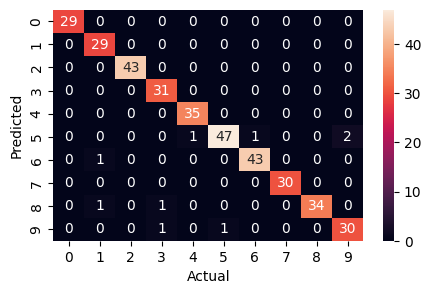

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
# To find where the model made mistakes
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(confusion_matrix(target_test, target_pred), annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")

print(classification_report(target_test, target_pred))